In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



In [111]:
# Load the dataset
df = pd.read_csv("../data/benin-malanville.csv")

In [112]:
# check the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [113]:
# Summary Statistics & Missing-Value Report
print("Summary Statistics & Missing-Value Report:")
print()
# Overview of numeric columns
print("The description of the numeric columns:")
df.describe()

Summary Statistics & Missing-Value Report:

The description of the numeric columns:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [114]:
# Check for missing values
print("Check for missing values:")
df.isna().sum()

Check for missing values:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [115]:
# checking the columns containing missing values rate greater than 5%
print("Checking the columns containing missing values rate greater than 5%:")
threshold = 0.05
missing_percent = df.isna().mean()
high_missing = missing_percent[missing_percent > threshold]
high_missing

Checking the columns containing missing values rate greater than 5%:


Comments    1.0
dtype: float64

In [116]:
# Outlier Detection & Basic Cleaning
print("Outlier Detection & Basic Cleaning:")

# Define the columns to check for outliers
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores and flag outliers (|Z| > 3)
z_scores = np.abs(stats.zscore(df[key_columns]))

# Flag rows with any |Z| > 3
outlier_mask = (z_scores > 3).any(axis=1)

# Show number of outliers
print(f"Number of outlier rows: {outlier_mask.sum()}")


Outlier Detection & Basic Cleaning:
Number of outlier rows: 7740


In [117]:
# drop outliers
print("Dropping outliers...")
df = df[~outlier_mask]

Dropping outliers...


In [118]:
# checking the rows with invalid values (irradiance targeted)
irradiance_cols = ["GHI", "DNI", "DHI", "ModA", "ModB"]

for col in irradiance_cols:
    invalid_count = (df[col] < 0).sum()
    print(f"{col}: {invalid_count} invalid values (< 0)")

# Drop invalid values
for col in irradiance_cols:
    df = df[df[col] >= 0]

GHI: 256963 invalid values (< 0)
DNI: 274469 invalid values (< 0)
DHI: 257300 invalid values (< 0)
ModA: 0 invalid values (< 0)
ModB: 0 invalid values (< 0)


In [119]:
country = "benin"  # change accordingly
output_path = f"../data/{country}_clean.csv"
df.to_csv(output_path, index=False)
print(f"Cleaned data exported to: {output_path}")

Cleaned data exported to: ../data/benin_clean.csv


In [120]:
# Time Series Analysis
print("Time Series Analysis:")

# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M')

# Set 'Timestamp' as index
df.set_index('Timestamp', inplace=True)

Time Series Analysis:


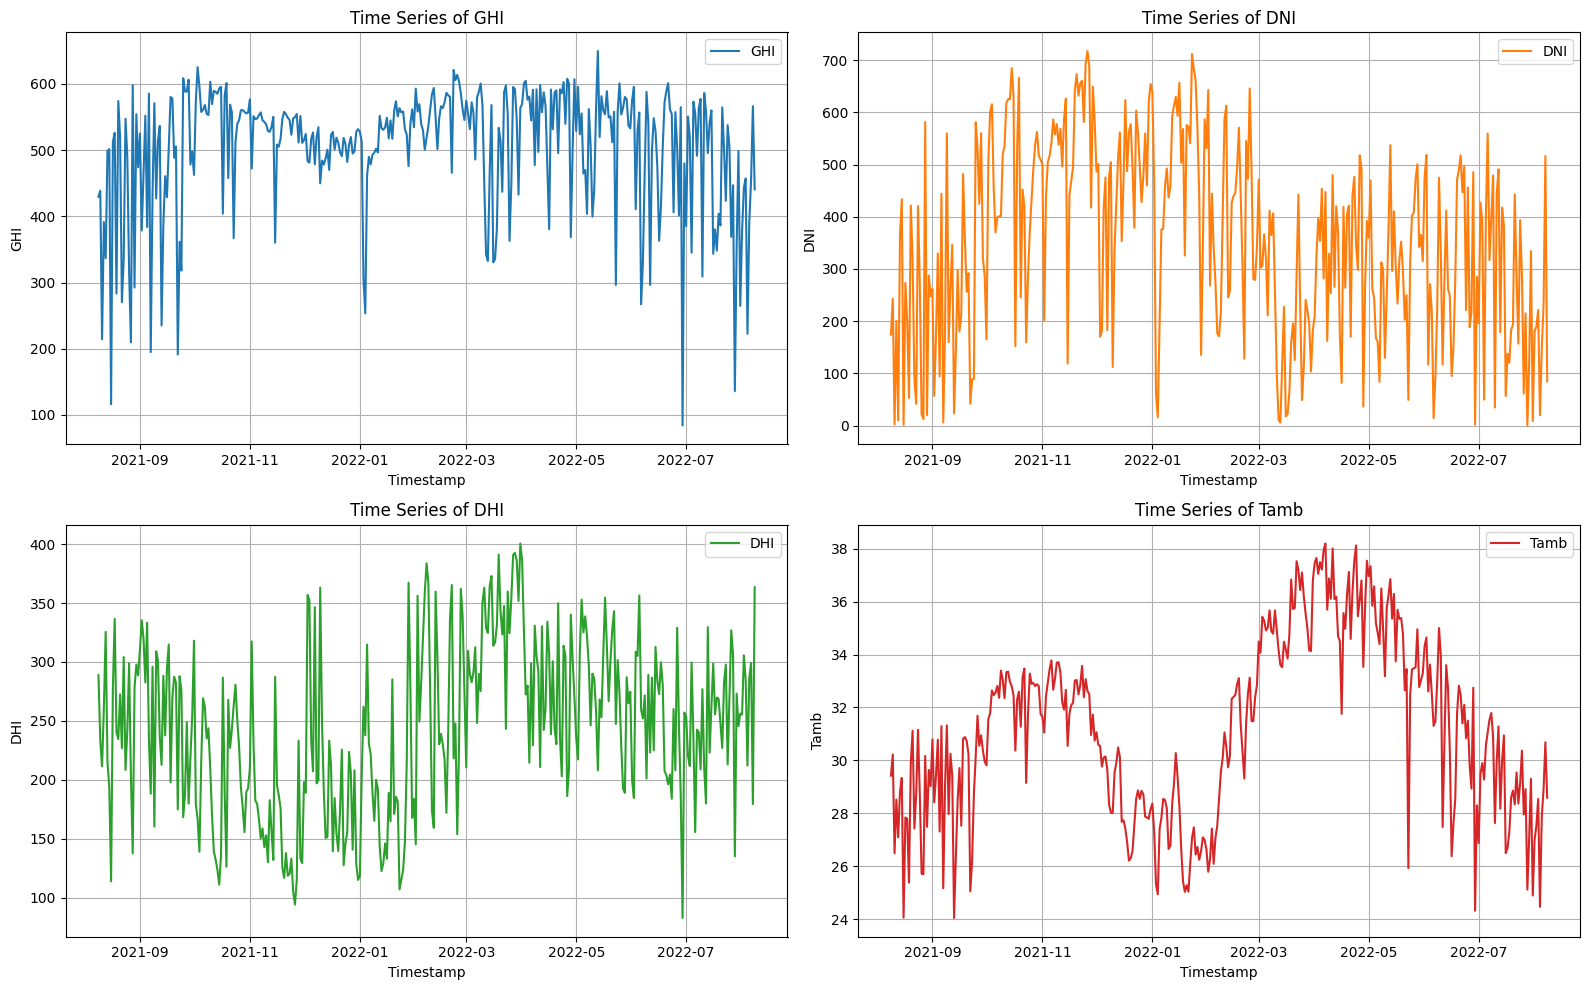

In [134]:

# Define the columns to plot
columns = ['GHI', 'DNI', 'DHI', 'Tamb']

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()  # Flatten to loop easily

# Plot each column in a separate plot
for i in range(len(columns)):
    col = columns[i]
    axs[i].plot(df.resample('D').mean().ffill().index, df[col].resample('D').mean().ffill(), label=col, color=colors[columns.index(col)])
    axs[i].set_title(f'Time Series of {col}')
    axs[i].set_xlabel('Timestamp')
    axs[i].set_ylabel(col)
    axs[i].grid(True)
    axs[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


Average ModA and ModB by Cleaning Status:
                ModA        ModB
Cleaning                        
0         497.291415  481.506579
1         307.636100  302.425519


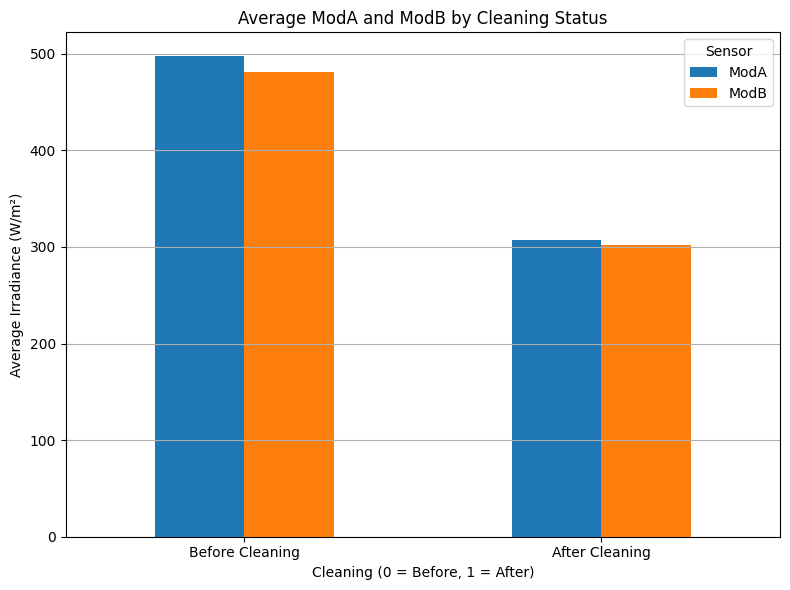

In [122]:
# Group by 'Cleaning' flag and compute mean for ModA and ModB
mod_means = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Print the means
print("Average ModA and ModB by Cleaning Status:")
print(mod_means)

# Plot as bar chart
mod_means.plot(kind='bar', figsize=(8, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Average ModA and ModB by Cleaning Status')
plt.xlabel('Cleaning (0 = Before, 1 = After)')
plt.ylabel('Average Irradiance (W/m²)')
plt.xticks(ticks=[0, 1], labels=['Before Cleaning', 'After Cleaning'], rotation=0)
plt.grid(axis='y')
plt.legend(title='Sensor')
plt.tight_layout()
plt.show()

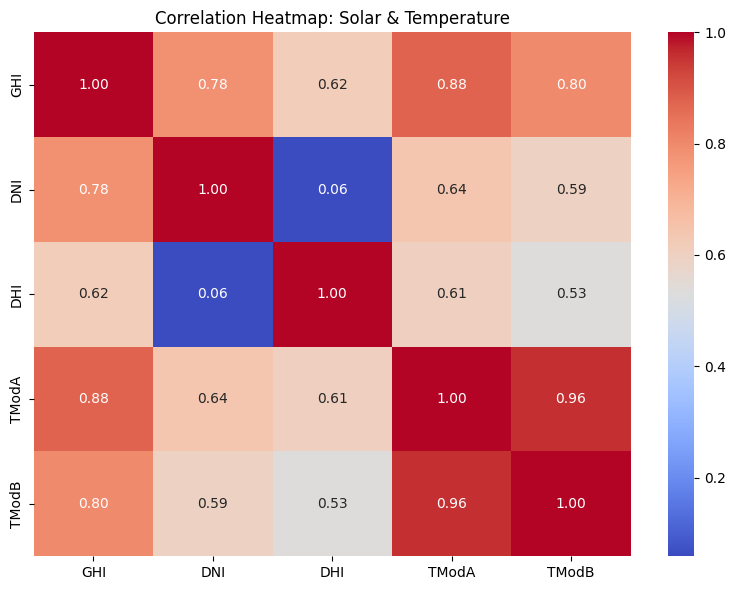

In [123]:
# Select relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Solar & Temperature')
plt.tight_layout()
plt.show()


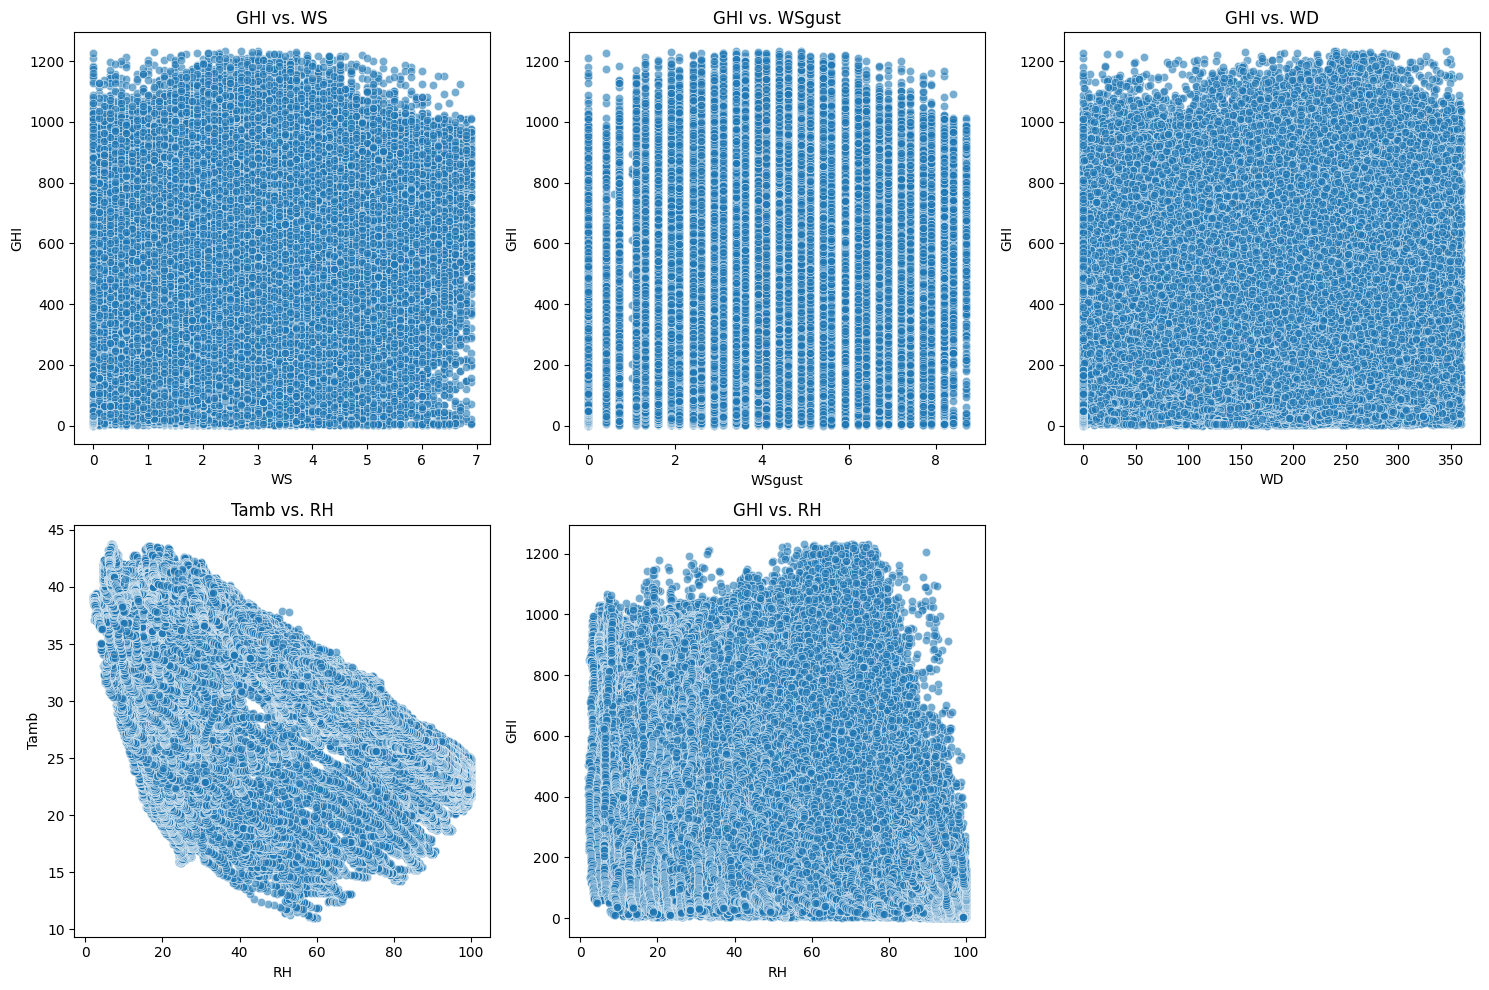

In [ ]:
# Scatter Plots of selected pairs
print("Scatter Plots of selected pairs:")
# Define pairs of columns to scatter plot
scatter_pairs = [
    ('WS', 'GHI'),
    ('WSgust', 'GHI'),
    ('WD', 'GHI'),
    ('RH', 'Tamb'),
    ('RH', 'GHI')
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (x, y) in enumerate(scatter_pairs):
    sns.scatterplot(data=df, x=x, y=y, ax=axes[i], alpha=0.6)
    axes[i].set_title(f'{y} vs. {x}')
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)

# Hide any unused subplot (6th if only 5 plots)
if len(scatter_pairs) < 6:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


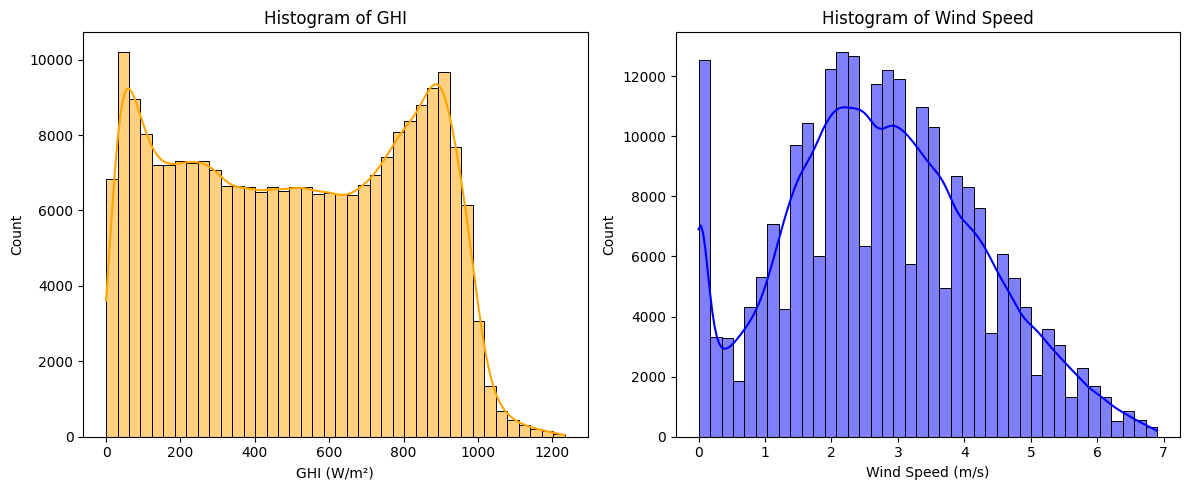

In [ ]:
# Histograms of GHI and Wind Speed

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['GHI'], bins=40, kde=True, ax=axes[0], color='orange')
axes[0].set_title("Histogram of GHI")
axes[0].set_xlabel("GHI (W/m²)")

sns.histplot(df['WS'], bins=40, kde=True, ax=axes[1], color='blue')
axes[1].set_title("Histogram of Wind Speed")
axes[1].set_xlabel("Wind Speed (m/s)")

plt.tight_layout()
plt.show()


Windrose plot for wind speed and direction:


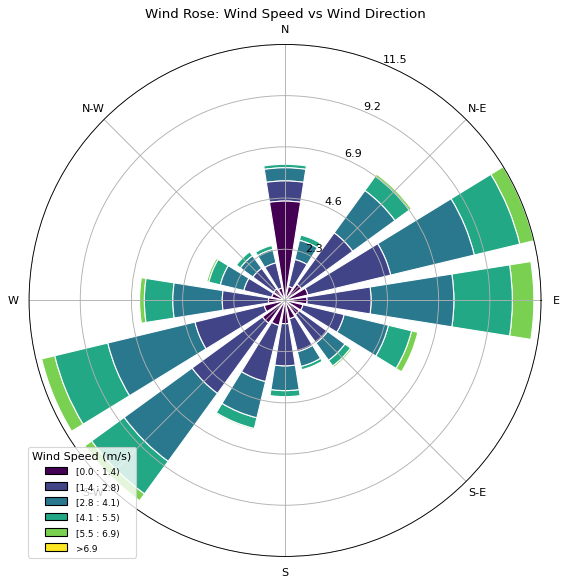

In [139]:
# windrose plot for wind speed and direction
print("Windrose plot for wind speed and direction:")

from windrose import WindroseAxes
# Create Windrose plot
wind_data = df[['WS', 'WD']]
ax = WindroseAxes.from_ax()
ax.bar(wind_data['WD'], wind_data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Wind Speed (m/s)")
plt.title("Wind Rose: Wind Speed vs Wind Direction")
plt.show()


Effect of RH on Temperature and GHI:


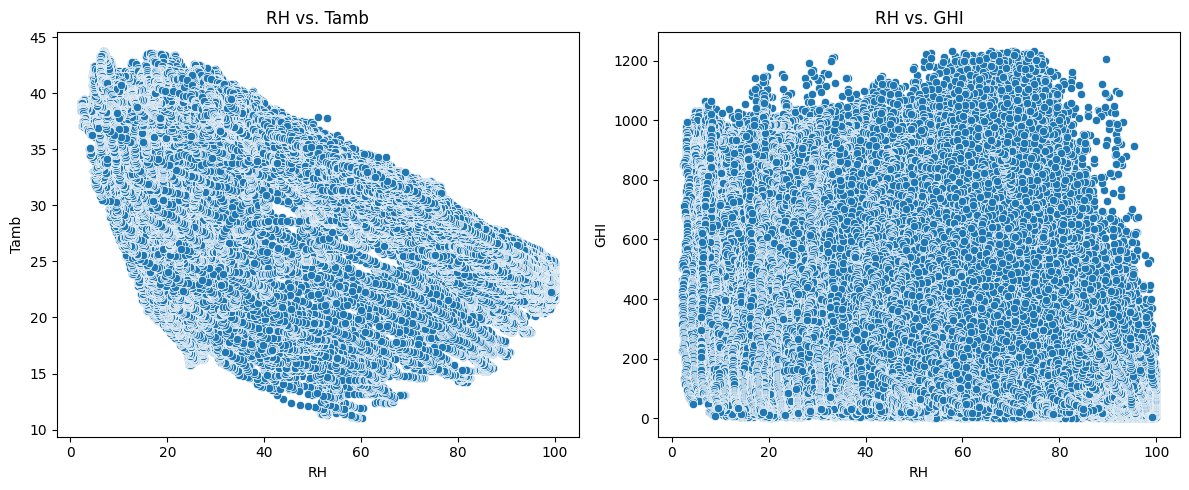

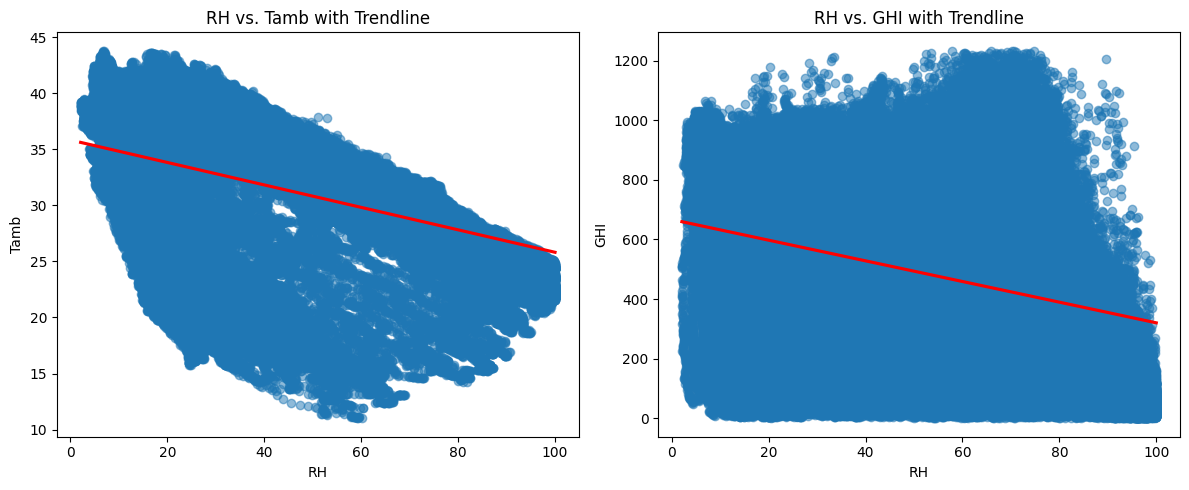

In [153]:
# Effect of RH on Temperature and GHI
print("Effect of RH on Temperature and GHI:")

# Scatter plots of RH vs Tamb and GHI
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x='RH', y='Tamb', data=df, ax=axs[0])
axs[0].set_title('RH vs. Tamb')

sns.scatterplot(x='RH', y='GHI', data=df, ax=axs[1])
axs[1].set_title('RH vs. GHI')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# trendline for RH vs Tamb
sns.regplot(x='RH', y='Tamb', data=df, ax=axs[0], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[0].set_title('RH vs. Tamb with Trendline')
# trendline for RH vs GHI
sns.regplot(x='RH', y='GHI', data=df, ax=axs[1], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[1].set_title('RH vs. GHI with Trendline')
plt.tight_layout()
plt.show()


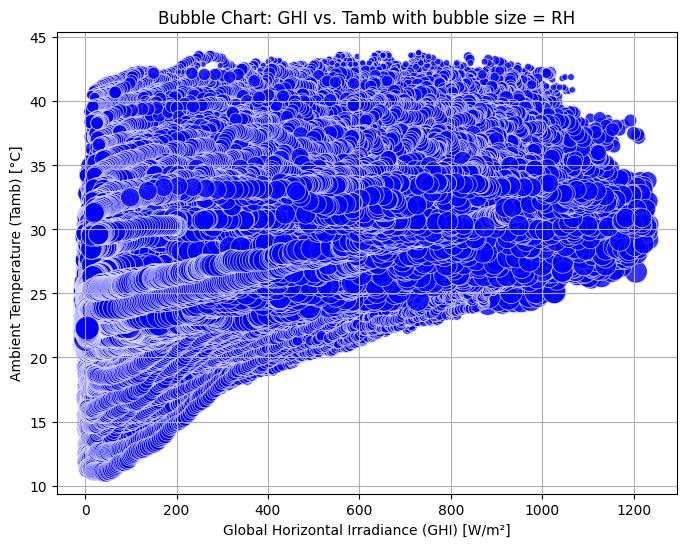

In [ ]:
# bubble chart of GHI vs Tamb with bubble size as RH
print("Bubble chart of GHI vs Tamb with bubble size as RH:")
plt.figure(figsize=(8,6))

# Choose bubble size variable: 'RH' or 'BP'
bubble_size = df['RH']  # or df['BP']

# Scale bubble sizes for better visualization
sizes = bubble_size / bubble_size.max() * 300  # adjust multiplier as needed

plt.scatter(df['GHI'], df['Tamb'], s=sizes, alpha=0.8, c='blue', edgecolors='w', linewidth=0.5)

plt.xlabel('Global Horizontal Irradiance (GHI) [W/m²]')
plt.ylabel('Ambient Temperature (Tamb) [°C]')
plt.title('Bubble Chart: GHI vs. Tamb with bubble size = RH')

plt.grid(True)
plt.show()
